In [1]:
import numpy as np
import poincarepy.potentials as pot
from poincarepy import PoincareMapper, PoincareCollection
import matplotlib.pyplot as plt
## To use interactive figures in jupyter: If not installed: conda install -c conda-forge ipympl / pip install ipympl
#%matplotlib ipympl

# Surfaces of Section
Assume again a phase space $\{x,y,\dot{x},\dot{y}\}$. As explained in the lecture, the conservation of total energy $$E = \phi + K = \phi(x,y) + \frac{1}{2}(x^2 + y^2)$$ makes it possible to eliminate one variable, say $y$:
$$ \dot{y} = \sqrt{2(E-\phi(x,y)) - \dot{x}^2}.$$
Setting $y=0$, one considers the reduced phase space $S = \{x,\dot{x}\}$. Any point $\vec{q}\in S$, together with an **orbit energy** $E$, describes a point in the full phase space:
$$\vec{q} = (x,\dot{x}) \longrightarrow \vec{r} = \left(x,0,\dot{x},\sqrt{2(E-\phi(x,0)) - \dot{x}^2}\right).$$

Picking a point $(x_0,\dot{x}_0)$ and integrating in time, the set of all points where the resulting orbit intersects the $y=0$ plane from above (by convention) is called a **Poincaré Map** of the orbit. Doing so for multiple orbits (at the same energy!) and collecting all the points produces a **Surface of Section** of that energy.

In [2]:
# We use again the logarithmic potential from the previous examples
logpot1 = pot.LogarithmicPotential(v0=10.,rc=1.,q=0.8)
mapper = PoincareMapper(logpot1)

We first fix an energy, say $E=70$ and compute the associated zero-velocity curve, as explained in the previous notebook

Text(0.5, 1.0, 'Zero-Velocity Curve, $E=70.00$, $y=0$')

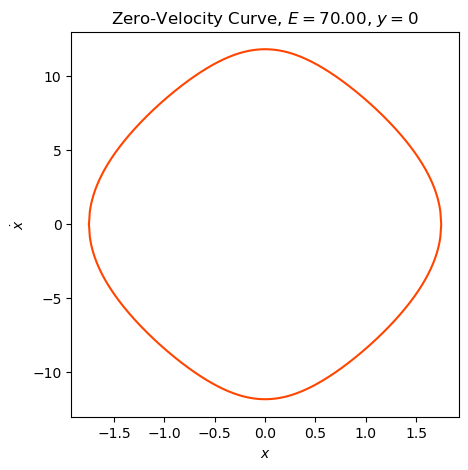

In [3]:
E_orb = 70
xlim = mapper.xlim(E_orb,xdot=0,a=-5,b=5)
X = np.linspace(xlim[0],xlim[1],400)
Xdot = mapper.zvc(E_orb,X)
zvc = np.array([np.hstack((X,X[::-1])),np.hstack((Xdot,-Xdot[::-1]))])
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax1.plot(zvc[0],zvc[1],color='orangered')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\dot{x}$')
ax1.set_title(f"Zero-Velocity Curve, $E={E_orb:.2f}$, $y=0$")

Let's pick a point inside the ZVC as a starting point. We can then integrate an orbit using this point as initial condition and record the points where the orbit intersects the $y=0$ plane.

In [4]:
# Set a starting point inside the zero-velocity curve shown above
q0 = np.array([0.5,5])

# To see the meaning of a Poincaré map, we integrate until the orbit crosses the y=0 plane a certain
# number of times
N_crossings = 10

# The integration is now performed using the integrate_orbit method, which works on the 2D reduced phase space
# and integrates until a specified number of crossings have occured (different from integrate_orbit_full used previously)
sec, orb = mapper.integrate_orbit(q0,E_orb,N_crossings)

Text(0.5, 1.0, 'Orbit')

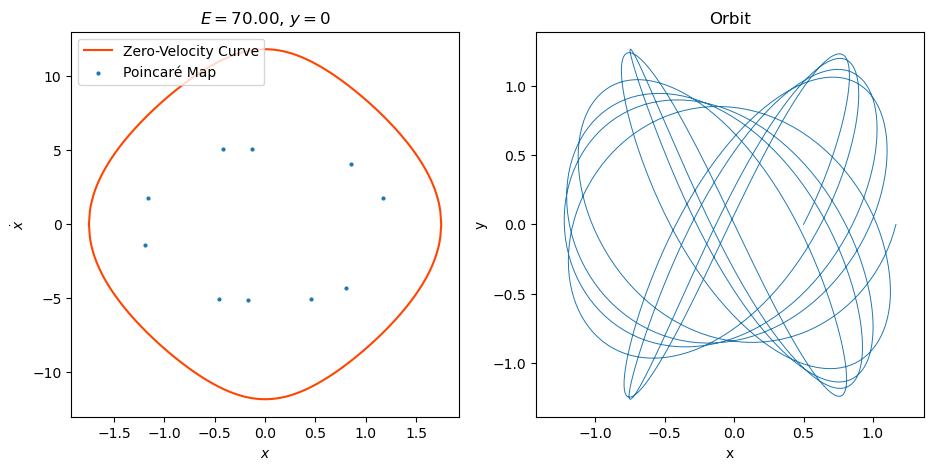

In [5]:
# We can then visualize both the Poincaré map and the orbit in (x,y) space to get an intuition
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(11,5))

ax1.plot(zvc[0],zvc[1],color='orangered',label="Zero-Velocity Curve")
ax1.scatter(sec[0],sec[1],s=4,label="Poincaré Map")
ax1.legend(loc='upper left')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\dot{x}$')
ax1.set_title(f"$E={E_orb:.2f}$, $y=0$")

ax2.axis('equal')
ax2.plot(orb[0],orb[1],lw=0.7)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Orbit")

To do this with many different orbits, poincarepy provides the `section` method. It will automatically find the xlim, compute the zero-velocity curve and integrate orbits using initial conditions distributed uniformly on the $\dot{x}=0$ axis.

In [6]:
# Here, the xlim argument is equivalent to (a,b) when using the xlim() method (i.e. it sets the range for the xlim search)
N_orbits = 10
N_crossings = 40
secs, orbs, zvc = mapper.section(E_orb,(-5,5),N_orbits,N_crossings)

Text(0.5, 1.0, '$E=70.00$, $y=0$')

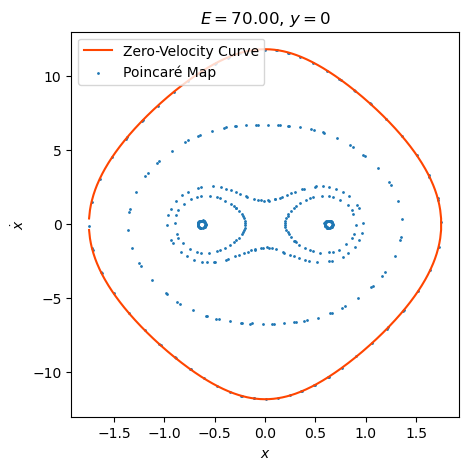

In [7]:
# Show the section
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))

sec_x = secs[:,0,:].reshape(N_orbits*N_crossings)
sec_y = secs[:,1,:].reshape(N_orbits*N_crossings)

ax1.plot(zvc[0],zvc[1],color='orangered',label="Zero-Velocity Curve")
ax1.scatter(sec_x,sec_y,s=1,label="Poincaré Map")
ax1.legend(loc='upper left')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\dot{x}$')
ax1.set_title(f"$E={E_orb:.2f}$, $y=0$")

**Suggestion**: Add more orbits/points to fill the surface of section

Finally, to produce surfaces of section at different energies, poincarepy provides the `sections_collection` method, that works in the same way as `sections` but takes an array of energies as input.

In [8]:
energies = np.array([10,30,50,70,90,110])
N_orbits = 30
secs_collection, orbs_collection, zvc_collection = mapper.section_collection(energies,(-5,5),N_orbits,N_crossings)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.61s/it]


Let's take a look at them:

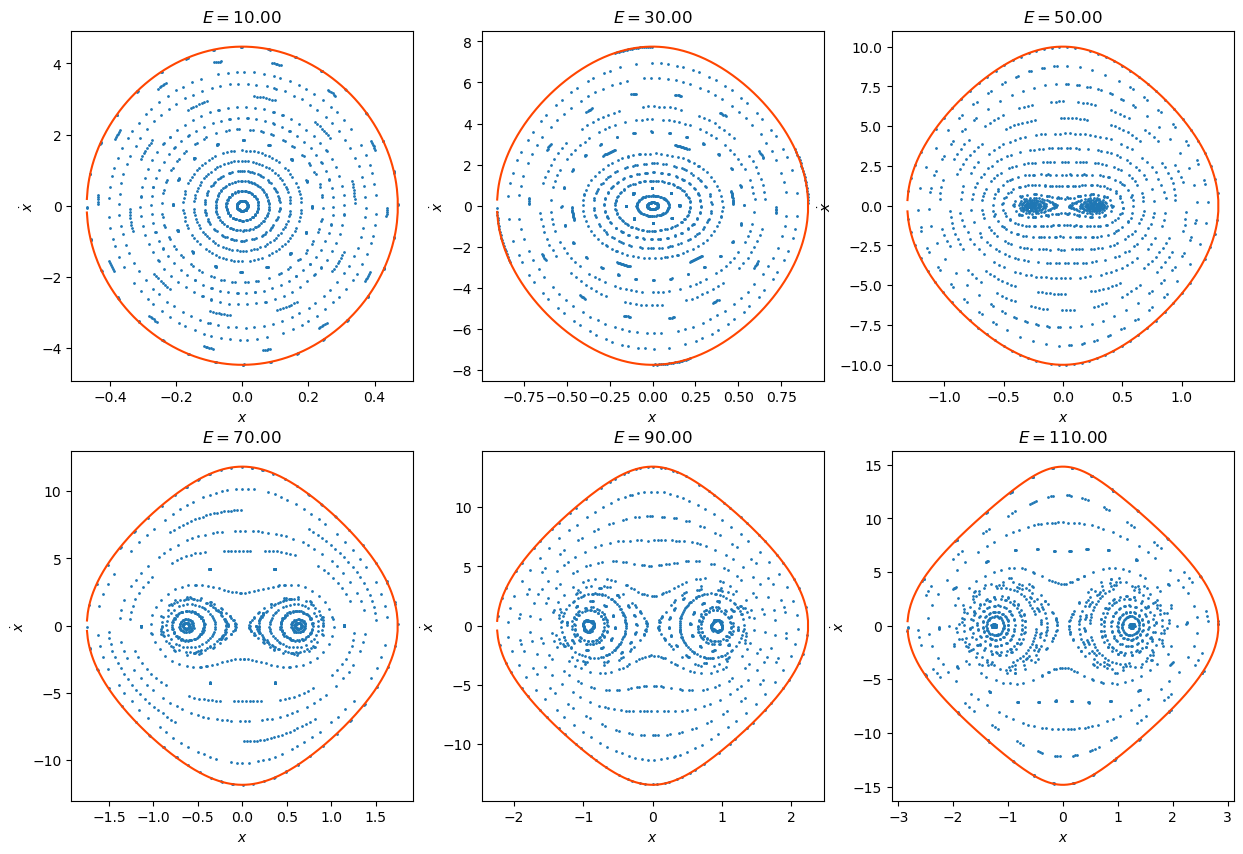

In [9]:
fig, axx = plt.subplots(2,3,figsize=(15,10))
axx = axx.flatten()
for i,ax in enumerate(axx):
    sec_x = secs_collection[i,:,0,:].reshape(N_orbits*N_crossings)
    sec_y = secs_collection[i,:,1,:].reshape(N_orbits*N_crossings)
    ax.plot(zvc_collection[i,0],zvc_collection[i,1],color='orangered')
    ax.scatter(sec_x,sec_y,s=1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\dot{x}$')
    ax.set_title(f"$E={energies[i]:.2f}$")

Finally, we'll save the results we obtained for the next example. Poincarepy provides a simple method for this, which uses `pickle` behind the scenes

In [12]:
col = PoincareCollection(energies,orbs_collection,secs_collection,zvc_collection,mapper,"example_collection.pkl")
col.save()